In [16]:
# Importing Necessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [15]:
#Importing the Datasets

df = pd.read_csv('report.csv')
crime = pd.read_csv('Crimes_-_2001_to_Present.csv')


C:\Users\jesva\AppData\Local\Temp\ipykernel_19328\3547366779.py:4: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  crime = pd.read_csv('Crimes_-_2001_to_Present.csv')


In [7]:
# It will display the Information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2829 entries, 0 to 2828
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   report_year          2829 non-null   int64  
 1   agency_code          2788 non-null   object 
 2   agency_jurisdiction  2829 non-null   object 
 3   population           2760 non-null   float64
 4   violent_crimes       2794 non-null   float64
 5   homicides            2795 non-null   float64
 6   rapes                2754 non-null   float64
 7   assaults             2753 non-null   float64
 8   robberies            2754 non-null   float64
 9   months_reported      2692 non-null   float64
 10  crimes_percapita     2794 non-null   float64
 11  homicides_percapita  2795 non-null   float64
 12  rapes_percapita      2754 non-null   float64
 13  assaults_percapita   2753 non-null   float64
 14  robberies_percapita  2754 non-null   float64
dtypes: float64(12), int64(1), object(2)
me

In [8]:
skewness = df.skew()
kurtosis = df.kurtosis()

# Print skewness and kurtosis for each feature
print("Skewness:")
print(skewness)
print("\nKurtosis:")
print(kurtosis)

Skewness:
report_year            0.000000
population             5.109259
violent_crimes         8.362704
homicides              8.316458
rapes                  4.083009
assaults               5.075008
robberies              7.375690
months_reported       -9.519964
crimes_percapita       1.265969
homicides_percapita    1.743993
rapes_percapita        0.768741
assaults_percapita     1.309187
robberies_percapita    1.534880
dtype: float64

Kurtosis:
report_year            -1.201431
population             30.448597
violent_crimes         70.783247
homicides              69.561346
rapes                  21.134327
assaults               31.164456
robberies              65.981647
months_reported        93.045411
crimes_percapita        2.168434
homicides_percapita     4.112764
rapes_percapita         0.704246
assaults_percapita      2.351455
robberies_percapita     3.208446
dtype: float64


C:\Users\jesva\AppData\Local\Temp\ipykernel_30668\1780134836.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  skewness = df.skew()
C:\Users\jesva\AppData\Local\Temp\ipykernel_30668\1780134836.py:2: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  kurtosis = df.kurtosis()


In [ ]:
# Data Cleaning

In [9]:
# Names of all columns

df.columns

Index(['report_year', 'agency_code', 'agency_jurisdiction', 'population',
       'violent_crimes', 'homicides', 'rapes', 'assaults', 'robberies',
       'months_reported', 'crimes_percapita', 'homicides_percapita',
       'rapes_percapita', 'assaults_percapita', 'robberies_percapita'],
      dtype='object')

In [10]:
# Checking for Duplicate Values

df.nunique()

report_year              41
agency_code              68
agency_jurisdiction      69
population             2740
violent_crimes         2526
homicides               521
rapes                   878
assaults               2280
robberies              2148
months_reported          12
crimes_percapita       2781
homicides_percapita    1872
rapes_percapita        2430
assaults_percapita     2723
robberies_percapita    2706
dtype: int64

In [12]:
df.describe()

,report_year,population,violent_crimes,homicides,rapes,assaults,robberies,months_reported,crimes_percapita,homicides_percapita,rapes_percapita,assaults_percapita,robberies_percapita
count,2829.000000,2.760000e+03,2.794000e+03,2795.000000,2754.000000,2753.000000,2754.000000,2692.000000,2794.000000,2795.000000,2754.000000,2753.000000,2754.000000
mean,1995.000000,7.956981e+05,2.963255e+04,398.385331,416.278867,4405.146023,4000.245098,11.868871,1093.049810,15.372812,59.305167,566.595434,459.968112
std,11.834251,1.012451e+06,1.728630e+05,2281.276402,479.811934,6977.293769,8653.902965,1.118194,676.884678,12.350640,31.971570,369.436996,340.903534
min,1975.000000,1.007630e+05,1.540000e+02,1.000000,15.000000,15.000000,83.000000,0.000000,16.490000,0.210000,1.640000,1.610000,11.460000
25%,1985.000000,3.779310e+05,3.014750e+03,32.000000,176.250000,1467.000000,1032.000000,12.000000,625.082500,6.955000,35.775000,319.090000,210.242500
50%,1995.000000,5.366145e+05,5.135500e+03,64.000000,291.000000,2597.000000,1940.000000,12.000000,949.680000,11.980000,55.900000,487.480000,374.400000
75%,2005.000000,8.168558e+05,9.058500e+03,131.000000,465.000000,4556.000000,3609.750000,12.000000,1409.507500,20.230000,77.797500,728.240000,612.005000
max,2015.000000,8.550861e+06,1.932274e+06,24703.000000,3899.000000,71030.000000,107475.000000,12.000000,4352.830000,94.740000,199.300000,2368.220000,2337.520000


In [13]:
mean_value = df.mean()
mean_value

C:\Users\jesva\AppData\Local\Temp\ipykernel_30668\2613903652.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean_value = df.mean()


report_year              1995.000000
population             795698.089130
violent_crimes          29632.545097
homicides                 398.385331
rapes                     416.278867
assaults                 4405.146023
robberies                4000.245098
months_reported            11.868871
crimes_percapita         1093.049810
homicides_percapita        15.372812
rapes_percapita            59.305167
assaults_percapita        566.595434
robberies_percapita       459.968112
dtype: float64

In [14]:
median_value = df.median()
median_value

C:\Users\jesva\AppData\Local\Temp\ipykernel_30668\484577360.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  median_value = df.median()


report_year              1995.00
population             536614.50
violent_crimes           5135.50
homicides                  64.00
rapes                     291.00
assaults                 2597.00
robberies                1940.00
months_reported            12.00
crimes_percapita          949.68
homicides_percapita        11.98
rapes_percapita            55.90
assaults_percapita        487.48
robberies_percapita       374.40
dtype: float64

In [15]:
mode_value = df.mode()
mode_value

,report_year,agency_code,agency_jurisdiction,population,violent_crimes,homicides,rapes,assaults,robberies,months_reported,crimes_percapita,homicides_percapita,rapes_percapita,assaults_percapita,robberies_percapita
0,1975.0,AZ00717,"Albuquerque, NM",999900.0,4579.0,14.0,187.0,1282.0,1381.0,12.0,288.44,5.05,70.81,428.94,71.37
1,1976.0,AZ00723,"Arlington, TX",NaN,5931.0,NaN,218.0,1421.0,NaN,NaN,522.21,NaN,NaN,NaN,88.33
2,1977.0,AZ01003,"Atlanta, GA",NaN,6027.0,NaN,NaN,1617.0,NaN,NaN,522.97,NaN,NaN,NaN,88.44
3,1978.0,CA00109,"Aurora, CO",NaN,NaN,NaN,NaN,1678.0,NaN,NaN,634.82,NaN,NaN,NaN,88.81
4,1979.0,CA01005,"Austin, TX",NaN,NaN,NaN,NaN,1892.0,NaN,NaN,652.16,NaN,NaN,NaN,95.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,NaN,VA02901,"Tulsa, OK",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65,NaN,VA12800,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,NaN,WASPD00,"Virginia Beach, VA",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,NaN,WIMPD00,"Washington, DC",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
std_dev = df.std()
std_dev

C:\Users\jesva\AppData\Local\Temp\ipykernel_30668\3542692881.py:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  std_dev = df.std()


report_year            1.183425e+01
population             1.012451e+06
violent_crimes         1.728630e+05
homicides              2.281276e+03
rapes                  4.798119e+02
assaults               6.977294e+03
robberies              8.653903e+03
months_reported        1.118194e+00
crimes_percapita       6.768847e+02
homicides_percapita    1.235064e+01
rapes_percapita        3.197157e+01
assaults_percapita     3.694370e+02
robberies_percapita    3.409035e+02
dtype: float64

In [17]:
variance = df.var()
variance

C:\Users\jesva\AppData\Local\Temp\ipykernel_30668\1609686221.py:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  variance = df.var()


report_year            1.400495e+02
population             1.025056e+12
violent_crimes         2.988162e+10
homicides              5.204222e+06
rapes                  2.302195e+05
assaults               4.868263e+07
robberies              7.489004e+07
months_reported        1.250357e+00
crimes_percapita       4.581729e+05
homicides_percapita    1.525383e+02
rapes_percapita        1.022181e+03
assaults_percapita     1.364837e+05
robberies_percapita    1.162152e+05
dtype: float64

In [11]:
#Checking Missing Values

df.isnull().sum()

report_year              0
agency_code             41
agency_jurisdiction      0
population              69
violent_crimes          35
homicides               34
rapes                   75
assaults                76
robberies               75
months_reported        137
crimes_percapita        35
homicides_percapita     34
rapes_percapita         75
assaults_percapita      76
robberies_percapita     75
dtype: int64

In [26]:
#Handling the Missing data

missing_indices = np.random.choice(df.index, size=5, replace=False)
df.loc[missing_indices, ['violent_crimes', 'robberies']] = np.nan

# Find and print missing values
missing_data = df[df.isnull().any(axis=1)]
print("Missing Data:")
print(missing_data)

# Impute missing values using mean imputation
data_imputed = df.fillna(df.mean())

# Print the imputed dataset
print("\nImputed Data:")
print(data_imputed)

Missing Data:
      report_year agency_code agency_jurisdiction  population  violent_crimes  \
30           1975     KY05680      Louisville, KY         NaN             NaN   
68           1975         NaN       United States         NaN       1039710.0   
99           1976     KY05680      Louisville, KY         NaN             NaN   
137          1976         NaN       United States         NaN       1004210.0   
168          1977     KY05680      Louisville, KY         NaN             NaN   
...           ...         ...                 ...         ...             ...   
2824         2015     OK07205           Tulsa, OK    401520.0          3628.0   
2825         2015     VA12800  Virginia Beach, VA    452797.0           626.0   
2826         2015     DCMPD00      Washington, DC    672228.0          8084.0   
2827         2015     KS08703         Wichita, KS    389824.0          3839.0   
2828         2015         NaN       United States         NaN       1197704.0   

      homicid

C:\Users\jesva\AppData\Local\Temp\ipykernel_19328\3025479857.py:12: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_imputed = df.fillna(df.mean())


In [27]:
# Drops the Missing values 'NAN' & Then Prints the dataframe

df.dropna(inplace=True)
print(df)

      report_year agency_code agency_jurisdiction  population  violent_crimes  \
0            1975     NM00101     Albuquerque, NM    286238.0          2383.0   
1            1975     TX22001       Arlington, TX    112478.0           278.0   
2            1975     GAAPD00         Atlanta, GA    490584.0          8033.0   
3            1975     CO00101          Aurora, CO    116656.0           611.0   
4            1975     TX22701          Austin, TX    300400.0          1215.0   
...           ...         ...                 ...         ...             ...   
2754         2014     AZ01003          Tucson, AZ    527328.0          3443.0   
2755         2014     OK07205           Tulsa, OK    399556.0          3217.0   
2756         2014     VA12800  Virginia Beach, VA    451102.0           667.0   
2757         2014     DCMPD00      Washington, DC    658893.0          7810.0   
2758         2014     KS08703         Wichita, KS    387493.0          2939.0   

      homicides  rapes  ass

In [28]:
# What are the total missing values in the dataset

print("Number of Missing Values in the whole dataset : ", df.isna().sum().sum())

Number of Missing Values in the whole dataset :  0


In [29]:
#Checking Missing Values

df.isnull().sum()

report_year            0
agency_code            0
agency_jurisdiction    0
population             0
violent_crimes         0
homicides              0
rapes                  0
assaults               0
robberies              0
months_reported        0
crimes_percapita       0
homicides_percapita    0
rapes_percapita        0
assaults_percapita     0
robberies_percapita    0
dtype: int64

In [33]:
# top 10 value counts available to us in terms of Location Description and the Primary Type of Crime

pd.value_counts(crime['Location Description'])[:10]

STREET                            1860436
RESIDENCE                         1212789
APARTMENT                          756513
SIDEWALK                           695307
OTHER                              270211
PARKING LOT/GARAGE(NON.RESID.)     203089
ALLEY                              158986
SCHOOL, PUBLIC, BUILDING           146418
RESIDENCE-GARAGE                   135595
SMALL RETAIL STORE                 130346
Name: Location Description, dtype: int64

<Axes: xlabel='count', ylabel='Location Description'>

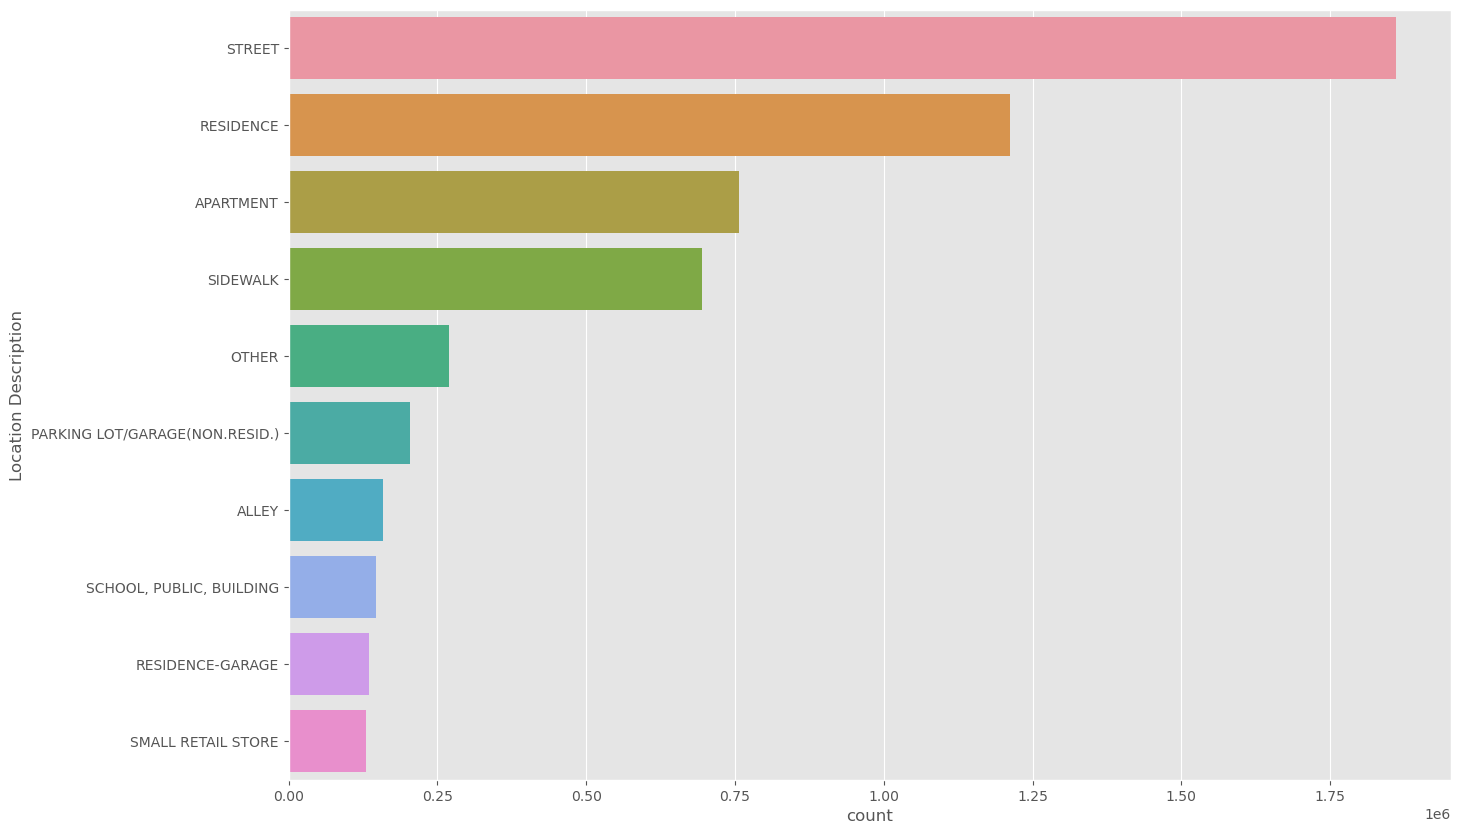

In [35]:
plt.figure(figsize = (15, 10))
sns.countplot(y= 'Location Description', data = crime, order = crime['Location Description'].value_counts().iloc[:10].index)

# Based on Theft

<Axes: xlabel='count', ylabel='Description'>

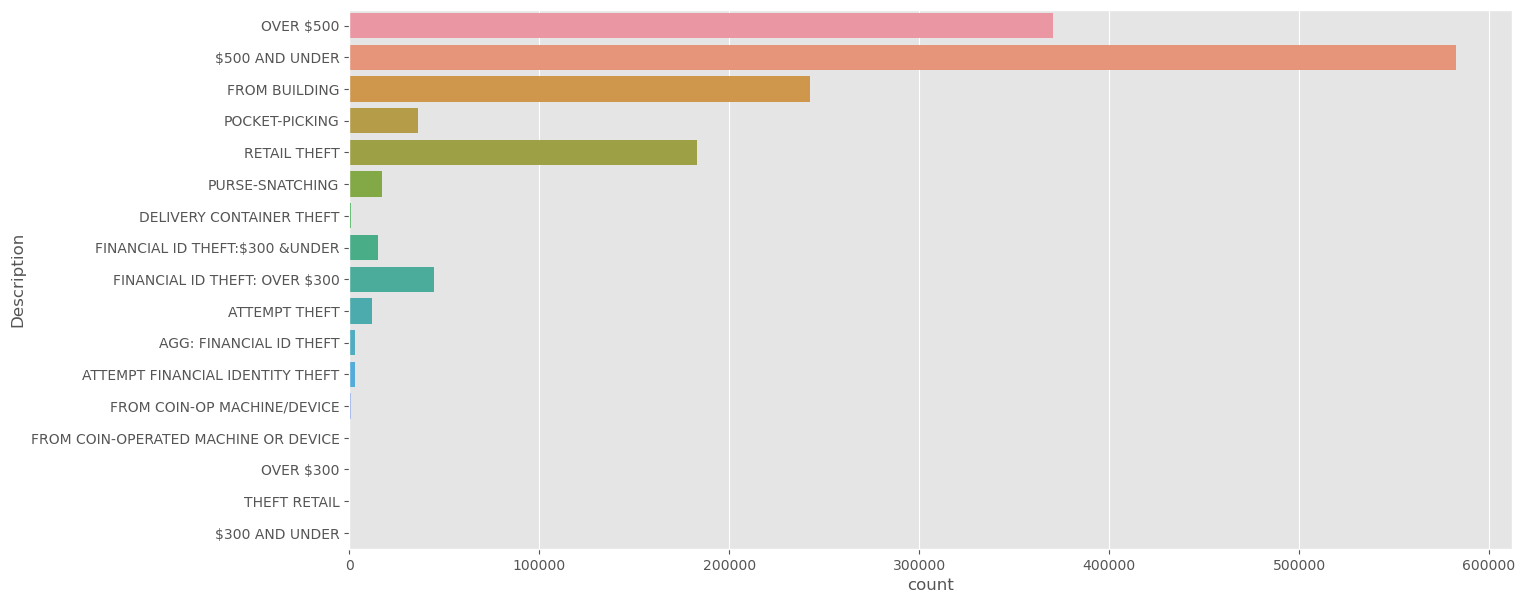

In [37]:
df_theft = crime[crime['Primary Type'] == 'THEFT']
plt.figure(figsize = (15, 7))
sns.countplot(y = df_theft['Description'])

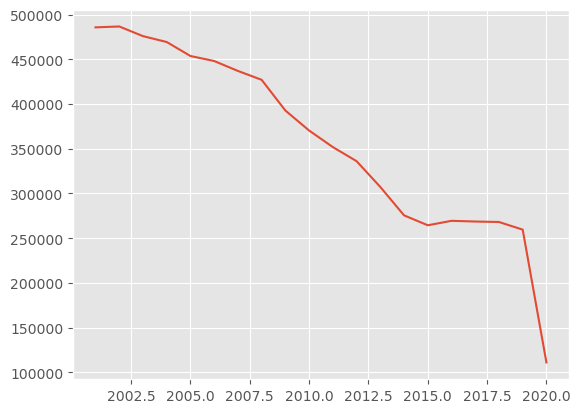

In [45]:
dates = pd.DataFrame(pd.value_counts(crime['Year']))
dates.sort_index()
plt.plot(dates.sort_index())
plt.show()

It looks like overall crime inside of Chicago has been declining over the years. I wonder what caused the recent spike. The reason that the crime rate inside of Chicago seems to have plummeted in the past year is simply that the data doesn't cover all of 2023, since the year is not yet over.

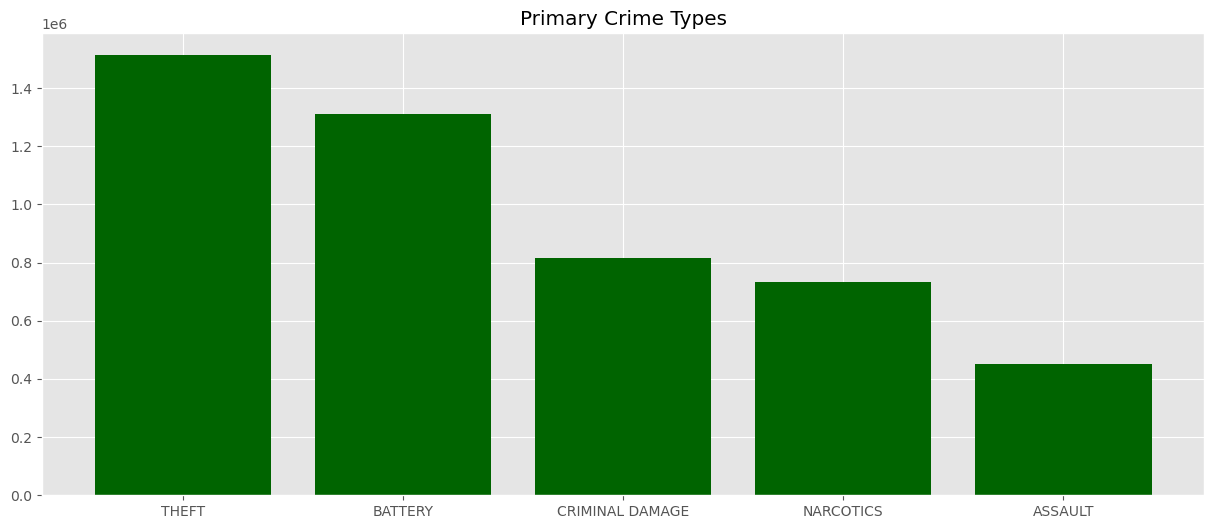

In [47]:
plt.figure(figsize=(15,6))
plt.title('Primary Crime Types')
types = pd.DataFrame(pd.value_counts(crime['Primary Type']))
filtered_types = types.iloc[:5]
plt.bar(filtered_types.index, filtered_types['Primary Type'],color='darkgreen')
plt.show()

In [19]:
# No.of Rows & Cols

df.shape


(2829, 15)

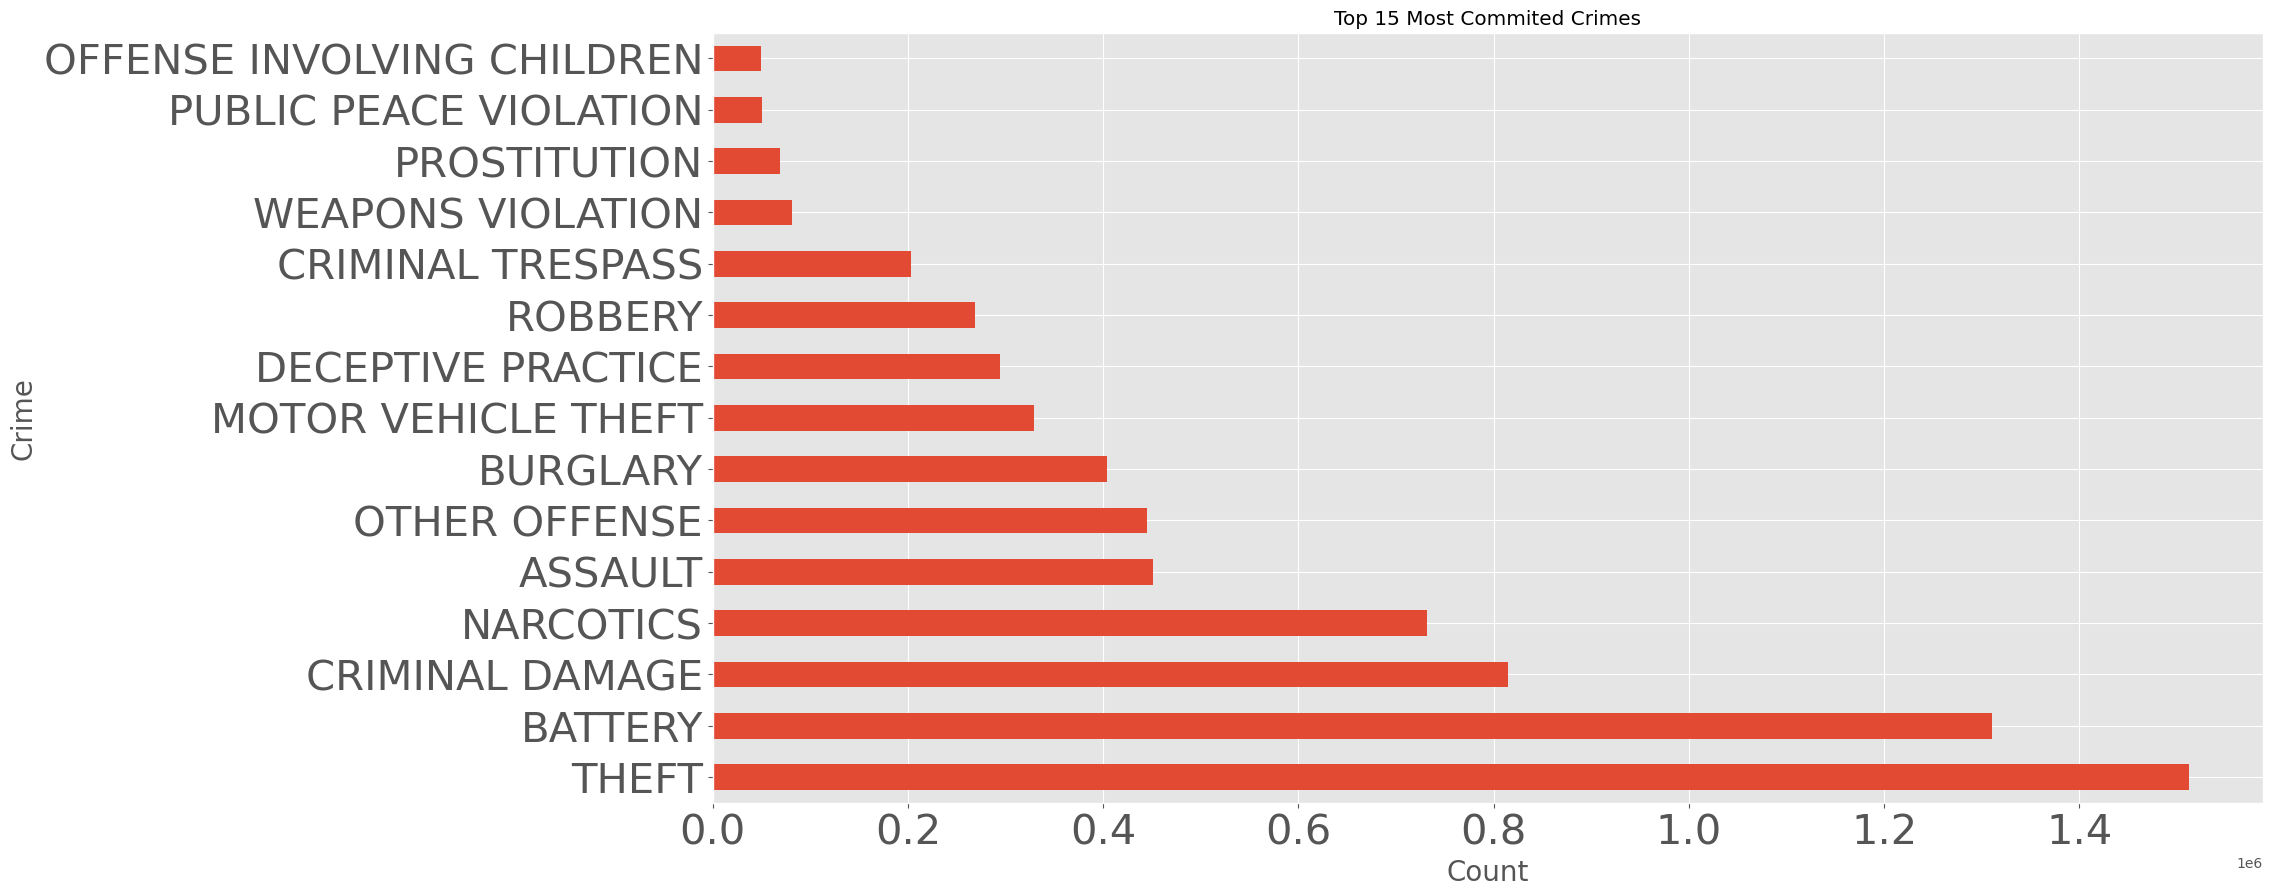

In [20]:
ax = crime.value_counts('Primary Type')[:15].\
    plot(kind = 'barh',\
         title = "Top 15 Most Commited Crimes",
        figsize = (20,10),
        fontsize = 30)

ax.set_xlabel("Count",fontsize=20)
ax.set_ylabel("Crime", fontsize=20)
plt.show()

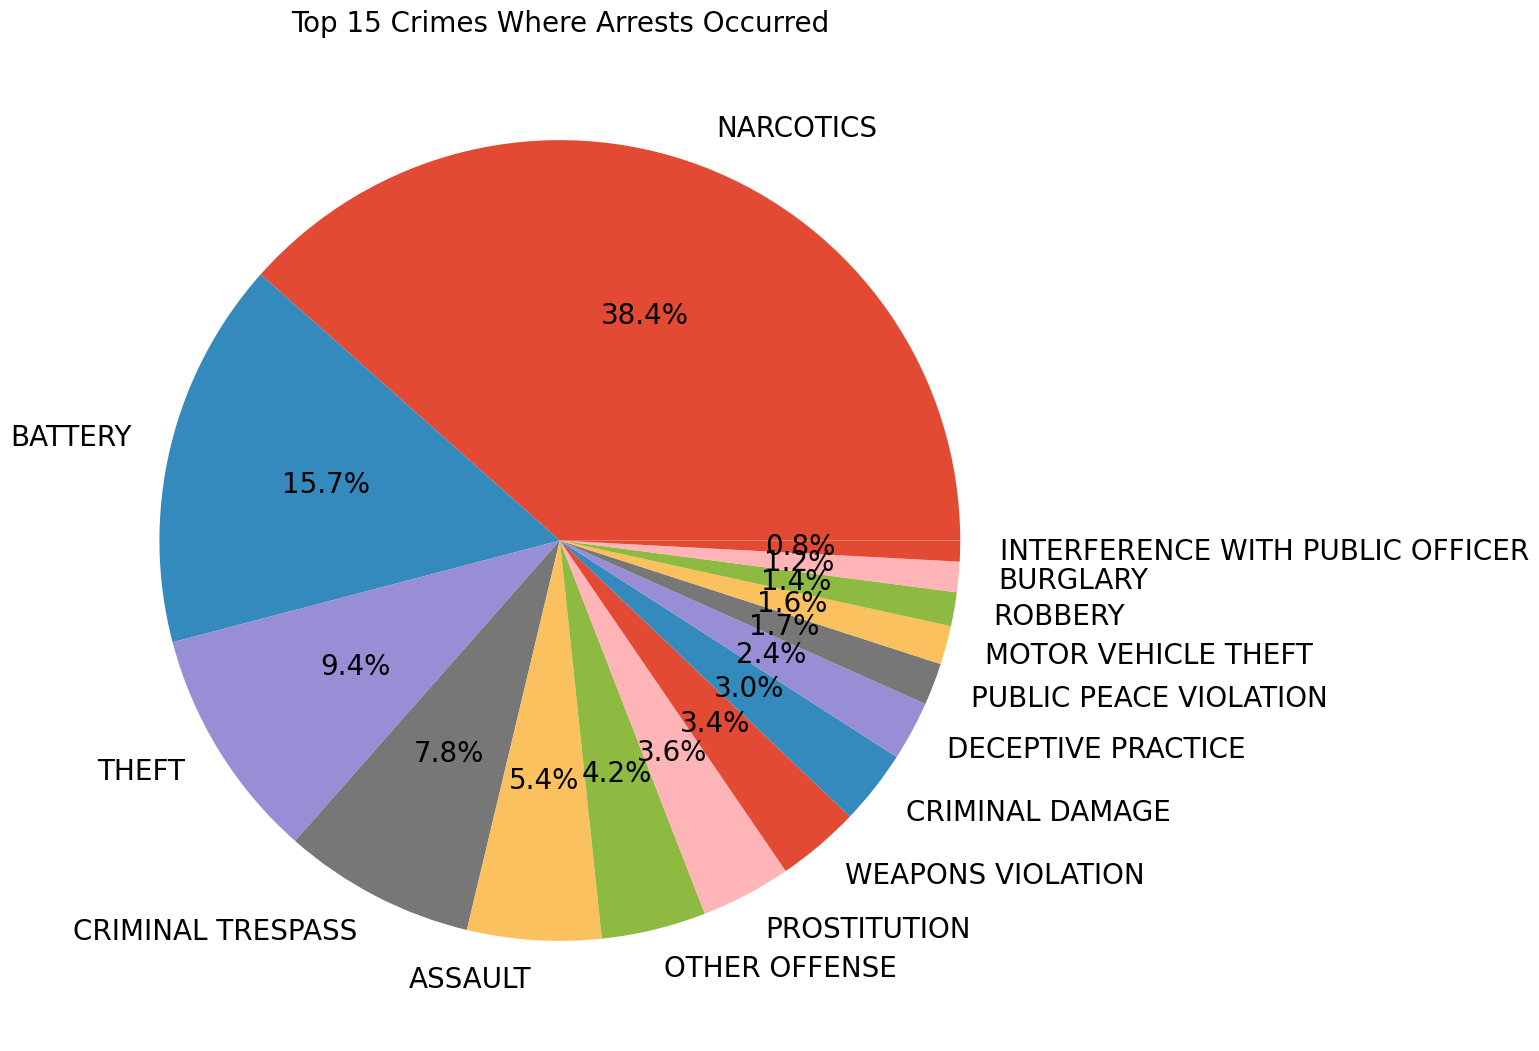

In [25]:
import matplotlib.pyplot as plt

# Calculate the top 15 crimes where arrests occurred and plot a pie chart
crime_top_15 = crime[crime['Arrest'] == True].value_counts("Primary Type")[:15]

plt.figure(figsize=(20, 13))  # Set figure size

ax = crime_top_15.plot(
    kind='pie',  # Change to pie chart
    autopct='%1.1f%%',  # Display percentage
    fontsize=20  # Set font size for labels
)

# Set labels and title
ax.set_ylabel('')
ax.set_title("Top 15 Crimes Where Arrests Occurred", fontsize=20)

# Show the plot
plt.show()


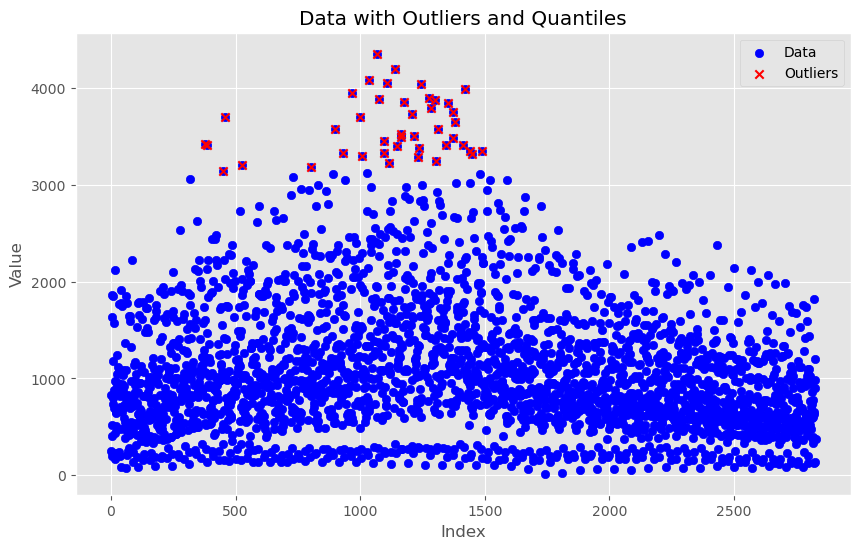

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def detect_outliers_z_score(data, threshold=3):

    outliers = []
    mean = np.mean(data)
    std_dev = np.std(data)

    for i, value in enumerate(data):
        z_score = (value - mean) / std_dev
        if np.abs(z_score) > threshold:
            outliers.append(i)

    return outliers

# Read the CSV file

data = pd.read_csv('report.csv')

# Extract the column containing numerical data
# You might need to replace 'column_name' with the actual column name containing the data
data_column = data['crimes_percapita']

# Detect outliers using Z-score
outliers_indices = detect_outliers_z_score(data_column)

# Calculate quantiles
quantiles = np.quantile(data_column, [0.25, 0.5, 0.75])

# Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(data_column.index, data_column, label='Data', color='blue')
plt.scatter(outliers_indices, data_column.iloc[outliers_indices], label='Outliers', color='red', marker='x')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Data with Outliers and Quantiles')
plt.legend()
plt.grid(True)
plt.show()

C:\Users\jesva\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\jesva\AppData\Local\Temp\ipykernel_19328\292176570.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['Cluster'] = labels


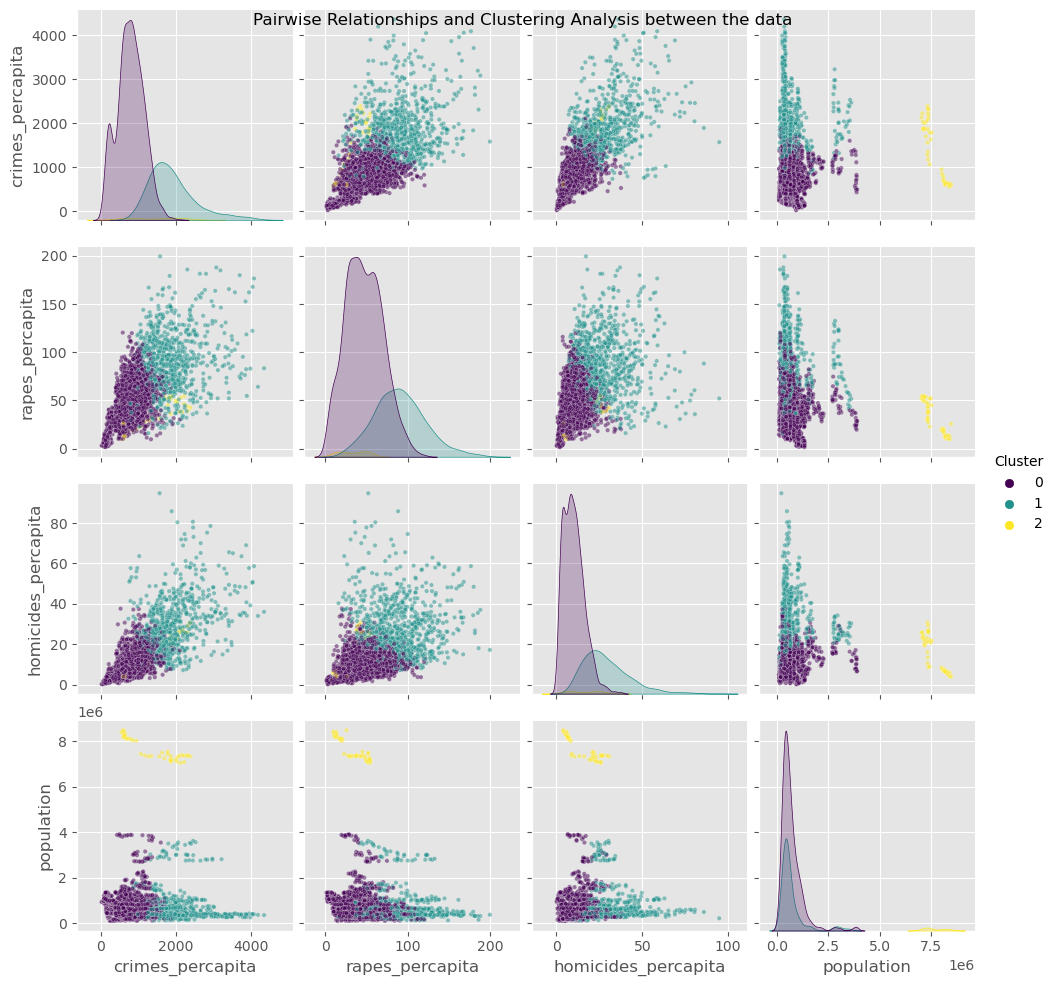

In [33]:
# Performing the K-Meabs Clustering

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


np.random.seed(42)
num_samples = 1000000
d = df[['crimes_percapita', 'rapes_percapita', 'homicides_percapita','population']]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(d)

# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_data)
labels = kmeans.labels_
d['Cluster'] = labels

# Visualize the clusters using a scatter matrix plot
sns.pairplot(d, hue='Cluster', palette='viridis', diag_kind='kde', plot_kws={'alpha': 0.5, 's': 10})
plt.suptitle('Pairwise Relationships and Clustering Analysis between the data')
plt.show()

In [48]:
def plot_top(df, group_by_column, value_column, title):
    # Group the data by the specified column and sum the values in the value column
    grouped_data = df.groupby(group_by_column)[value_column].sum()
    
    # Create a line plot
    plt.figure(figsize=(12, 8))
    ax = grouped_data.plot(kind='line', marker='o', linestyle='-', color='purple', alpha=0.7)

    ax.set_ylabel(value_column)
    ax.set_xlabel(group_by_column)
    ax.set_title(title)
    plt.show()



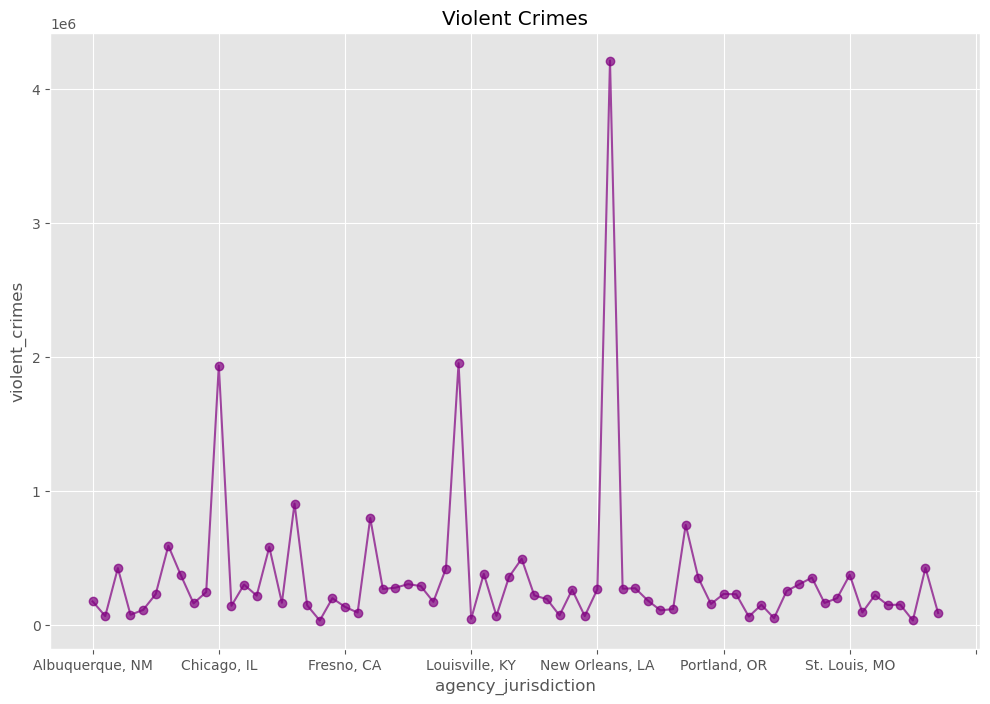

In [49]:
plot_top(df, "agency_jurisdiction", "violent_crimes", 'Violent Crimes')
